In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

Data Loading & Inspection

In [2]:
# Load the dataset
# Ensure the dataset is in the correct path
df = pd.read_csv("data/restaurant_sales_data.csv").copy()
print("Dataset shape",df.shape)
df.info()

Dataset shape (390, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           390 non-null    object
 1   Item Name      390 non-null    object
 2   Category       390 non-null    object
 3   Unit Price     390 non-null    int64 
 4   Cost Price     390 non-null    int64 
 5   Quantity Sold  390 non-null    int64 
 6   Revenue        390 non-null    int64 
 7   Gross Profit   390 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 24.5+ KB


Data Cleaning - column names, data types

In [3]:
# Nomalize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')

In [4]:
# Descriptive statistics
print("Descriptive statistics:")
df.describe(include='all', datetime_is_numeric=True) # date_time is numeric to silence warning

Descriptive statistics:


,date,item_name,category,unit_price,cost_price,quantity_sold,revenue,gross_profit
count,390,390,390,390.000000,390.000000,390.000000,390.000000,390.000000
unique,NaN,13,4,NaN,NaN,NaN,NaN,NaN
top,NaN,Grilled Chicken,Main Course,NaN,NaN,NaN,NaN,NaN
freq,NaN,30,120,NaN,NaN,NaN,NaN,NaN
mean,2023-06-15 12:00:00.000000256,NaN,NaN,446.153846,176.923077,8.992308,4016.410256,2409.666667
min,2023-06-01 00:00:00,NaN,NaN,150.000000,40.000000,1.000000,150.000000,110.000000
25%,2023-06-08 00:00:00,NaN,NaN,300.000000,120.000000,5.000000,1800.000000,1140.000000
50%,2023-06-15 12:00:00,NaN,NaN,400.000000,180.000000,9.000000,3200.000000,1980.000000
75%,2023-06-23 00:00:00,NaN,NaN,500.000000,200.000000,12.000000,5500.000000,3200.000000
max,2023-06-30 00:00:00,NaN,NaN,850.000000,420.000000,27.000000,17850.000000,9030.000000


Dataset Summary
- **Data Range**: Transactional records between June 1 - June 30, 2023
- **Menu items**: 13 items across categories: Main Course, Appetizer, Dessert, Beverage
- **People's choice**: Grilled chicken is the most ordered item on the menu
- **Food budget**: Food items are within a price range of Ksh. 150 - 850

## Menu Analysis & Classification

In [14]:
# Convert raw transaction data into item-level summaries
menu_summary = (
    df.groupby(['item_name', 'category', 'unit_price', 'cost_price'])
    .agg({
        'quantity_sold': 'sum',
        'revenue': 'sum',
        'gross_profit': 'sum'
    })
    .reset_index()
)

In [15]:
menu_summary

,item_name,category,unit_price,cost_price,quantity_sold,revenue,gross_profit
0,Beef Burger,Main Course,650,200,261,169650,117450
1,Bottled Water,Beverage,150,40,288,43200,31680
2,Caesar Salad,Appetizer,400,150,262,104800,65500
3,Chocolate Cake,Dessert,500,220,289,144500,80920
4,French Fries,Appetizer,300,120,297,89100,53460
5,Fresh Juice,Beverage,300,100,242,72600,48400
6,Fruit Salad,Dessert,450,200,339,152550,84750
7,Grilled Chicken,Main Course,850,420,305,259250,131150
8,Margherita Pizza,Main Course,750,300,244,183000,109800
9,Soda,Beverage,200,60,278,55600,38920


In [16]:
# Compute derived metrics
menu_summary["profit_per_item"] = menu_summary["unit_price"] - menu_summary["cost_price"]
menu_summary["total_sales_volume"] = menu_summary["quantity_sold"]
menu_summary["revenue_contribution_%"] = (menu_summary["revenue"] / menu_summary["revenue"].sum()) * 100
menu_summary["profit_margin_%"] = (menu_summary["profit_per_item"] / menu_summary["unit_price"]) * 100

# Select relevant columns for inspection
menu_summary = menu_summary[[
    "item_name", "category", "unit_price", "cost_price", "profit_per_item",
    "total_sales_volume", "revenue", "revenue_contribution_%",
    "gross_profit", "profit_margin_%"
]]

menu_summary.sort_values(by="total_sales_volume", ascending=False)

,item_name,category,unit_price,cost_price,profit_per_item,total_sales_volume,revenue,revenue_contribution_%,gross_profit,profit_margin_%
6,Fruit Salad,Dessert,450,200,250,339,152550,9.738892,84750,55.555556
7,Grilled Chicken,Main Course,850,420,430,305,259250,16.550689,131150,50.588235
4,French Fries,Appetizer,300,120,180,297,89100,5.688202,53460,60.000000
3,Chocolate Cake,Dessert,500,220,280,289,144500,9.224974,80920,56.000000
1,Bottled Water,Beverage,150,40,110,288,43200,2.757916,31680,73.333333
9,Soda,Beverage,200,60,140,278,55600,3.549540,38920,70.000000
2,Caesar Salad,Appetizer,400,150,250,262,104800,6.690501,65500,62.500000
0,Beef Burger,Main Course,650,200,450,261,169650,10.830567,117450,69.230769
8,Margherita Pizza,Main Course,750,300,450,244,183000,11.682840,109800,60.000000
5,Fresh Juice,Beverage,300,100,200,242,72600,4.634831,48400,66.666667


**Thresholds for Classification**

This is the decision rule to put items into 4 quadrants

We'll be using the median of `total_sales_volume` and `profit_per_item` as cutoff points.

In [18]:
# Define thresholds for classification
sales_threshold = menu_summary["total_sales_volume"].median()
profit_threshold = menu_summary["profit_per_item"].median()

# Classification logic
def classify(row):
    if row["total_sales_volume"] >= sales_threshold and row["profit_per_item"] >= profit_threshold:
        return "Star"
    elif row["total_sales_volume"] >= sales_threshold and row["profit_per_item"] < profit_threshold:
        return "Plowhorse"
    elif row["total_sales_volume"] < sales_threshold and row["profit_per_item"] >= profit_threshold:
        return "Puzzle"
    else:
        return "Dog"

# Apply classification
menu_summary["classification"] = menu_summary.apply(classify, axis=1)

# Show classification result
menu_summary[["item_name", "total_sales_volume", "profit_per_item", "classification"]].sort_values(by="classification")


,item_name,total_sales_volume,profit_per_item,classification
5,Fresh Juice,242,200,Dog
10,Tomato Soup,239,220,Dog
11,Vanilla Ice Cream,230,220,Dog
1,Bottled Water,288,110,Plowhorse
4,French Fries,297,180,Plowhorse
9,Soda,278,140,Plowhorse
0,Beef Burger,261,450,Puzzle
8,Margherita Pizza,244,450,Puzzle
12,Vegetable Stir Fry,233,320,Puzzle
2,Caesar Salad,262,250,Star


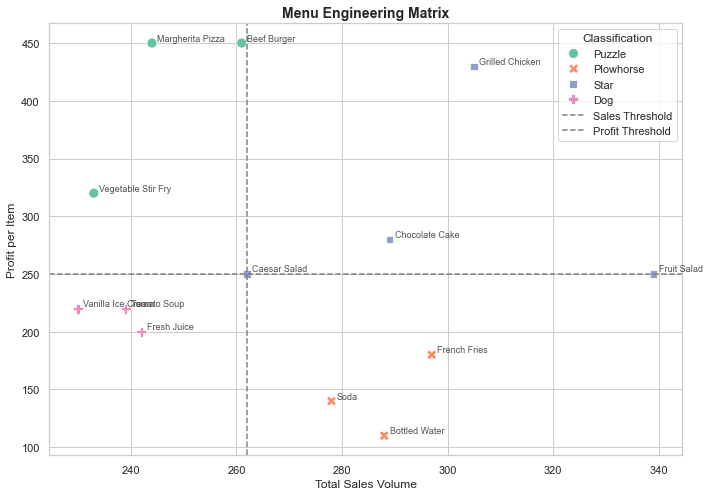

In [35]:
# Create the 2x2 plot
plt.figure(figsize=(10, 7))
plot = sns.scatterplot(
    data=menu_summary,
    x="total_sales_volume",
    y="profit_per_item",
    hue="classification",
    style="classification",
    s=100,
    palette="Set2"
)

# Plot threshold lines
plt.axvline(sales_threshold, color='gray', linestyle='--', label="Sales Threshold")
plt.axhline(profit_threshold, color='gray', linestyle='--', label="Profit Threshold")

# Annotate points
for i in range(menu_summary.shape[0]):
    item = menu_summary.iloc[i]
    plt.text(
        item["total_sales_volume"] + 1,
        item["profit_per_item"] + 2,
        item["item_name"],
        fontsize=9,
        alpha=0.8
    )

# Set labels and title
plt.title("Menu Engineering Matrix", fontsize=14, weight='bold')
plt.xlabel("Total Sales Volume")
plt.ylabel("Profit per Item")
plt.legend(title="Classification")
plt.tight_layout()
plt.show()

In [34]:
# Define suggested actions based on classification
def suggest_action(classification):
    return {
        "Star": "Promote heavily and maintain quality",
        "Plowhorse": "Reduce cost or adjust pricing",
        "Puzzle": "Rebrand or pair with offers",
        "Dog": "Consider removing or replacing"
    }.get(classification, "")

menu_summary["suggested_action"] = menu_summary["classification"].apply(suggest_action)

In [36]:
menu_summary

,item_name,category,unit_price,cost_price,profit_per_item,total_sales_volume,revenue,revenue_contribution_%,gross_profit,profit_margin_%,classification,suggested_action
0,Beef Burger,Main Course,650,200,450,261,169650,10.830567,117450,69.230769,Puzzle,Rebrand or pair with offers
1,Bottled Water,Beverage,150,40,110,288,43200,2.757916,31680,73.333333,Plowhorse,Reduce cost or adjust pricing
2,Caesar Salad,Appetizer,400,150,250,262,104800,6.690501,65500,62.500000,Star,Promote heavily and maintain quality
3,Chocolate Cake,Dessert,500,220,280,289,144500,9.224974,80920,56.000000,Star,Promote heavily and maintain quality
4,French Fries,Appetizer,300,120,180,297,89100,5.688202,53460,60.000000,Plowhorse,Reduce cost or adjust pricing
5,Fresh Juice,Beverage,300,100,200,242,72600,4.634831,48400,66.666667,Dog,Consider removing or replacing
6,Fruit Salad,Dessert,450,200,250,339,152550,9.738892,84750,55.555556,Star,Promote heavily and maintain quality
7,Grilled Chicken,Main Course,850,420,430,305,259250,16.550689,131150,50.588235,Star,Promote heavily and maintain quality
8,Margherita Pizza,Main Course,750,300,450,244,183000,11.682840,109800,60.000000,Puzzle,Rebrand or pair with offers
9,Soda,Beverage,200,60,140,278,55600,3.549540,38920,70.000000,Plowhorse,Reduce cost or adjust pricing


## Time-Based Trend Analysis

We'll create a new column to flag weekdays vs weekends, then group and analyze accordingly.

In [37]:
df["date"] = pd.to_datetime(df["date"])
df["day_name"] = df["date"].dt.day_name()
df["day_of_week"] = df["date"].dt.dayofweek  # Monday = 0, Sunday = 6
df["day_type"] = df["day_of_week"].apply(lambda x: "Weekend" if x >= 5 else "Weekday")

In [42]:
trend_summary = (
    df.groupby(["item_name","day_type"])
    .agg({
        "quantity_sold": "sum",
        "revenue": "sum",
        "gross_profit": "sum"
    })
    .reset_index()
)

In [43]:
pivot_trends = trend_summary.pivot(index="item_name", columns="day_type", values="quantity_sold").fillna(0)

In [59]:
# Count how many weekdays and weekends in the data
weekend_days = df[df["day_type"] == "Weekend"]["date"].nunique()
weekday_days = df[df["day_type"] == "Weekday"]["date"].nunique()

# Normalize quantity sold per day
pivot_trends["Weekend per Day"] = pivot_trends["Weekend"] / weekend_days
pivot_trends["Weekday per Day"] = pivot_trends["Weekday"] / weekday_days
pivot_trends["weekend_lift_%"] = ((pivot_trends["Weekend per Day"] - pivot_trends["Weekday per Day"]) / pivot_trends["Weekday per Day"]) * 100
pivot_trends = pivot_trends.sort_values(by="weekend_lift_%", ascending=False)

In [60]:
pivot_trends

day_type,Weekday,Weekend,Weekend per Day,Weekday per Day,weekend_lift_%
item_name,,,,,
Fresh Juice,161,81,10.125,7.318182,38.354037
Caesar Salad,180,82,10.250,8.181818,25.277778
Vanilla Ice Cream,162,68,8.500,7.363636,15.432099
Fruit Salad,239,100,12.500,10.863636,15.062762
Chocolate Cake,204,85,10.625,9.272727,14.583333
Margherita Pizza,175,69,8.625,7.954545,8.428571
Bottled Water,207,81,10.125,9.409091,7.608696
Soda,200,78,9.750,9.090909,7.250000
Vegetable Stir Fry,169,64,8.000,7.681818,4.142012


What items should be featured in weekend specials?

What underperformers could be discounted midweek?

In [22]:
print(df.columns.to_list())

['date', 'item_name', 'category', 'unit_price', 'cost_price', 'quantity_sold', 'revenue', 'gross_profit']


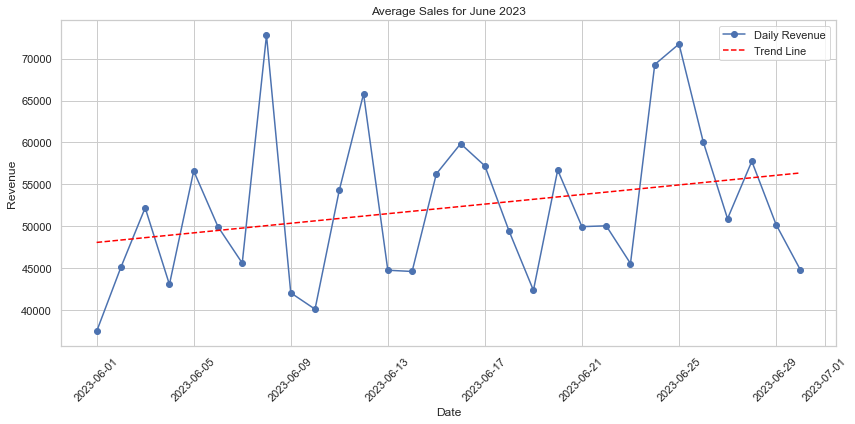

In [32]:
# Plot average sales for month june
plt.figure(figsize=(12, 6))
monthly_sales = df.groupby(df['date'].dt.to_period('D')).agg({'revenue': 'sum'}).reset_index()
monthly_sales['date'] = monthly_sales['date'].dt.to_timestamp()
plt.plot(monthly_sales['date'], monthly_sales['revenue'], marker='o', linestyle='-', color='b', label='Daily Revenue')
# Add trend line
z = np.polyfit(monthly_sales['date'].map(pd.Timestamp.toordinal), monthly_sales['revenue'], 1)
p = np.poly1d(z)
plt.plot(
    monthly_sales['date'],
    p(monthly_sales['date'].map(pd.Timestamp.toordinal)),
    color='red',
    linestyle='--',
    label='Trend Line'
)
plt.title('Average Sales for June 2023')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()